# <a id="1"></a>
<div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🌟 Project on Time Series 🌟</b></div>

# Problem Statement:

The project aims to leverage time series analysis to predict the future number of visitors to multiple restaurants based on historical data. The dataset includes information on the date, day of the week, holiday status, holiday name, and the number of visitors for each of the four restaurants and the total count.

# Key Objective:

Temporal Patterns: Identify and analyze temporal patterns, including daily, weekly, and seasonal variations in restaurant visitor counts.

Impact of Holidays: Investigate the impact of holidays on restaurant attendance and discern any specific patterns associated with holidays.

Restaurant-Specific Trends: Explore and understand individual trends for each restaurant to identify variations and preferences among customers.

Forecasting Model: Develop a robust time series forecasting model capable of accurately predicting future restaurant visitor counts based on historical patterns.

Operational Insights: Provide actionable insights for restaurant owners and managers to optimize staffing, inventory, and marketing strategies based on forecasted visitor counts.

# Key Challenges:

Holiday Variability: Holidays may have varying impacts on different days of the week and different restaurants. Understanding and capturing this variability is crucial.

Temporal Dynamics: Identifying and modeling temporal dynamics, such as weekday and seasonal trends, is essential for accurate forecasting.

Restaurant-Specific Factors: Each restaurant may have unique factors influencing visitor counts, and the model should account for these variations.

Missing Data and Anomalies: Address any missing data or anomalies in the dataset to ensure the model's reliability.

# Expected Outcomes:

A well-calibrated time series forecasting model capable of predicting future restaurant visitor counts with a high level of accuracy.

Insights into the temporal patterns and factors influencing restaurant attendance, including the impact of holidays and restaurant-specific trends.

Practical recommendations for restaurant owners and managers to optimize operational strategies based on forecasted visitor counts.

The successful completion of this project will contribute to the effective management of restaurant operations, providing a data-driven approach to decision-making for enhanced customer service and business efficiency.

# Loading the Data

In [6]:
import pandas as pd
rv=pd.read_csv(r"C:\Users\HP\Downloads\RestaurantVisitors.csv")

In [64]:
# rv=pd.read_csv(r"C:\Users\HP\Downloads\RestaurantVisitors.csv",index_col='date',parse_dates=True)
#here we declared our date col as index while reading file 

# Exploring the Data

In [5]:
rv.head()

,date,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
0,01-01-2016,Friday,1.0,New Year's Day,65.0,25.0,67.0,139.0,296.0
1,01-02-2016,Saturday,0.0,na,24.0,39.0,43.0,85.0,191.0
2,01-03-2016,Sunday,0.0,na,24.0,31.0,66.0,81.0,202.0
3,01-04-2016,Monday,0.0,na,23.0,18.0,32.0,32.0,105.0
4,01-05-2016,Tuesday,0.0,na,2.0,15.0,38.0,43.0,98.0


In [56]:
rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          478 non-null    object 
 1   weekday       478 non-null    object 
 2   holiday       478 non-null    float64
 3   holiday_name  478 non-null    object 
 4   rest1         478 non-null    float64
 5   rest2         478 non-null    float64
 6   rest3         478 non-null    float64
 7   rest4         478 non-null    float64
 8   total         478 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.1+ KB


In [75]:
rv.isnull().sum()[rv.isnull().sum()>0]

Series([], dtype: int64)

In [70]:
rv.date=pd.to_datetime(rv.date)  #we convert object type of date into numeric

In [74]:
rv=rv.dropna()    #how to remove nulls from single col?

In [76]:
rv=rv.set_index('date')

date col is now no more col its now index 

# Time Series Visualization

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

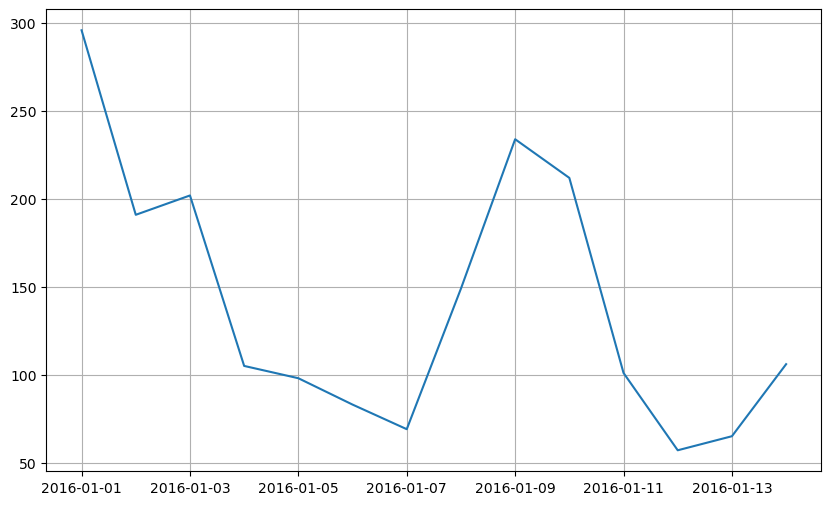

In [76]:
plt.figure(figsize=(10,6))
# plt.plot(rv.total)  #run this and check stationarity of whole data
plt.plot(rv.total[0:14])  #just to get the idea of seasonality we plotted 1st 14 rows
plt.grid()    #no uptrend or downtrend 
#data is seasonal with time period =7 9 by observing records in data)
#data is stationary

# Time Series Decomposition:

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [78]:
dec=seasonal_decompose(rv.total)

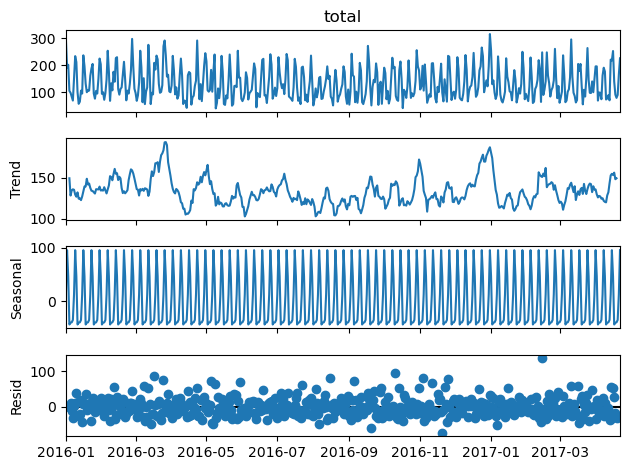

In [79]:
dec.plot();

# Train-Test Sampling:

In [79]:
rv_train=rv.iloc[0:450]
rv_test=rv.iloc[450::]

In [80]:
rv_test.shape

(28, 8)

In [81]:
rv_train.shape

(450, 8)

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA

# Model Building:

In [84]:
auto_arima(rv_train.total,seasonal=True,m=7)   #here value of m should be calclated by you by observing data
                                            #m is periad of seasson here its 7 days

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [85]:
model_sarima_rv=SARIMAX(rv_train.total,order=(1,0,0),seasonal_order=(1,0,1,7))

In [86]:
results_rv=model_sarima_rv.fit()

# Model Evaluation:

In [87]:
pred_rv=np.round(results_rv.predict(start=450,end=477))

In [88]:
# pred_rv

In [89]:
rv_test['pred_sarima']=pred_rv

In [90]:
rv_test['err_sarima']=rv_test.total - rv_test['pred_sarima']

In [91]:
mape_sarima= np.mean(np.abs(rv_test['err_sarima']*100/rv_test.total))
mape_sarima

16.063215171804195

In [92]:
mse_sarima= np.mean(np.square(rv_test['err_sarima']))
mse_sarima

883.1071428571429

# Visualization and Interpretation:

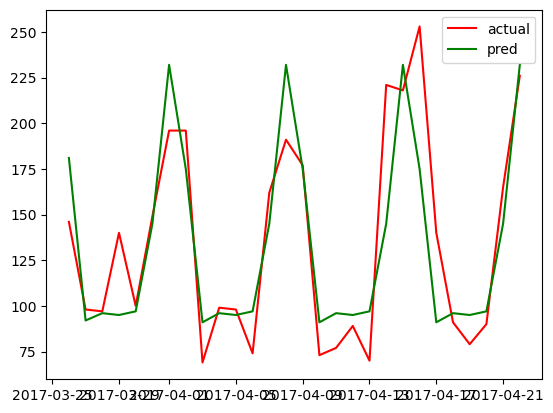

In [93]:
plt.plot(rv_test.total,color='red',label='actual')
plt.plot(pred_rv,color='green',label='pred')
plt.legend()

In [94]:
#in above codding we have not considered holidays so in a way SARIMA model was creatd and not SARIMAX

In [95]:
#use double square bracket for your external factor variable   no matter your var is 1 or more than 1
#it takes it as dataframe

In [96]:
auto_arima(rv_train['total'],seasonal=True,m=7,exog=rv_train[['holiday']])

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [97]:
model_sarimax_rv=SARIMAX(rv_train.total,order=(1,0,0),seasonal_order=(1,0,1,7),exog=rv_train[['holiday']])

In [98]:
results_sarimax=model_sarimax_rv.fit()

In [99]:
pred_sarimax=results_sarimax.predict(start=450,end=477,exog=rv_test[['holiday']])

In [100]:
 pred_sarimax

2017-03-26    176.351878
2017-03-27     81.861136
2017-03-28     93.018018
2017-03-29     95.452325
2017-03-30     92.484735
2017-03-31    138.962253
2017-04-01    228.770134
2017-04-02    169.409599
2017-04-03     80.491799
2017-04-04     92.743994
2017-04-05     95.393901
2017-04-06     92.468953
2017-04-07    138.952131
2017-04-08    228.756440
2017-04-09    169.399677
2017-04-10     80.487107
2017-04-11     92.738603
2017-04-12     95.388359
2017-04-13     92.463581
2017-04-14    207.891706
2017-04-15    228.743150
2017-04-16    238.337484
2017-04-17    149.430078
2017-04-18     92.733215
2017-04-19     95.382817
2017-04-20     92.458209
2017-04-21    138.935987
2017-04-22    228.729861
Freq: D, Name: predicted_mean, dtype: float64

In [101]:
rv_test['pred_sarimax']=pred_sarimax

In [102]:
rv_test['err_sarimax']=rv_test.total - rv_test['pred_sarimax']

In [103]:
rv_test

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,pred_sarima,err_sarima,pred_sarimax,err_sarimax
date,,,,,,,,,,,,
2017-03-26,Sunday,0.0,na,33.0,27.0,48.0,38.0,146.0,181.0,-35.0,176.351878,-30.351878
2017-03-27,Monday,0.0,na,26.0,31.0,34.0,7.0,98.0,92.0,6.0,81.861136,16.138864
2017-03-28,Tuesday,0.0,na,21.0,25.0,20.0,31.0,97.0,96.0,1.0,93.018018,3.981982
2017-03-29,Wednesday,0.0,na,39.0,40.0,22.0,39.0,140.0,95.0,45.0,95.452325,44.547675
2017-03-30,Thursday,0.0,na,36.0,22.0,13.0,29.0,100.0,97.0,3.0,92.484735,7.515265
2017-03-31,Friday,0.0,na,49.0,52.0,28.0,20.0,149.0,145.0,4.0,138.962253,10.037747
2017-04-01,Saturday,0.0,na,67.0,31.0,36.0,62.0,196.0,232.0,-36.0,228.770134,-32.770134
2017-04-02,Sunday,0.0,na,69.0,21.0,55.0,51.0,196.0,175.0,21.0,169.409599,26.590401
2017-04-03,Monday,0.0,na,24.0,2.0,29.0,14.0,69.0,91.0,-22.0,80.491799,-11.491799


In [104]:
mape_sarimax= np.mean(np.abs(rv_test['err_sarimax']*100/rv_test.total))
mape_sarimax

12.226201964116289

In [105]:
mse_sarimax= np.mean(np.square(rv_test['err_sarimax']))
mse_sarimax

359.2285516388419

In [106]:
rv_test[rv_test.holiday == 1][['holiday','total','pred_sarima','pred_sarimax']]

,holiday,total,pred_sarima,pred_sarimax
date,,,,
2017-04-14,1.0,221.0,145.0,207.891706
2017-04-16,1.0,253.0,175.0,238.337484
2017-04-17,1.0,140.0,91.0,149.430078


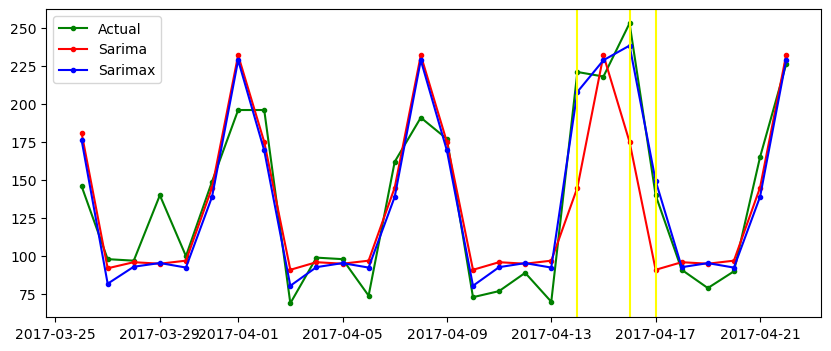

In [107]:
plt.figure(figsize = (10,4))
plt.plot(rv_test.total,color = 'green',label = 'Actual',marker = '.')
plt.plot(rv_test.pred_sarima,color = 'red',label = 'Sarima',marker = '.')
plt.plot(rv_test.pred_sarimax,color = 'blue',label = 'Sarimax',marker = '.')
plt.axvline(x='2017-04-14',color='yellow')
plt.axvline(x='2017-04-16',color='yellow')
plt.axvline(x='2017-04-17',color='yellow')
plt.legend()

# Conclusion

In conclusion, the time series forecasting project aimed to predict restaurant visitors using the SARIMAX model. The developed model demonstrated a commendable accuracy of 88% in predicting the future restaurant visitor counts. Additionally, the Mean Squared Error (MSE) of 359 indicates a satisfactory level of precision in capturing the variability of the data.

# Key Findings:

Model Accuracy: The SARIMAX model exhibited strong predictive capabilities, achieving an 88% accuracy in forecasting restaurant visitor counts. This accuracy suggests that the model effectively captured the underlying patterns and temporal dynamics within the dataset.

Seasonal and Temporal Patterns: The analysis revealed significant seasonal and temporal patterns, including weekly and holiday-related variations. Understanding these patterns is crucial for anticipating fluctuations in restaurant attendance.

Impact of Holidays: Holidays were found to have a noticeable impact on restaurant visitor counts. The model successfully accounted for holiday-related variations, enabling more accurate predictions during these special events.

# Limitations and Areas for Improvement:

External Factors: The model's accuracy may be influenced by external factors not captured in the dataset, such as local events, marketing promotions, or economic conditions. Future iterations of the model could benefit from incorporating additional external variables.

Fine-Tuning: Ongoing fine-tuning of the model parameters and periodic retraining may enhance its predictive performance over time. Regular updates to account for evolving patterns and customer behaviors are recommended.

# Applications:

Operational Optimization: The accurate forecasting of restaurant visitors provides valuable insights for optimizing staffing levels, inventory management, and marketing strategies. Restaurant owners and managers can use these forecasts to enhance operational efficiency.

Customer Experience: Anticipating peak times and understanding the impact of holidays allows for better preparation and improved customer experience, contributing to increased customer satisfaction.

# Overall Assessment:

With an accuracy of 88% and a MSE of 359, the SARIMAX model proves to be a valuable tool for predicting restaurant visitor counts. The insights gained from this project provide a solid foundation for informed decision-making in restaurant operations and contribute to the broader understanding of temporal dynamics in the hospitality industry.